In [1]:
# HIDDEN in jupyterbook 
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import warnings
#warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Modules from Modelflow 
from modelclass import model 

# optional functionalities 
model.widescreen()
model.scroll_off()

# Output compatabiltity with LaTeX 
latex=True

In [4]:
mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=1,keep='Business as Usual')
alternative  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 30")
result = mpak(alternative,2020,2100,keep='Carbon tax nominal 30',ljit=False,nfirst=800,maxiteration=1000) # simulates the model 

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [5]:
with mpak.set_smpl(2020,2030):
    print(mpak['PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER'].dif.df)

      PAKGGREVCO2CER  PAKGGREVCO2GER  PAKGGREVCO2OER
2020       35.549839       71.000884        38.71065
2021       35.549839       71.000884        38.71065
2022       35.549839       71.000884        38.71065
2023       35.549839       71.000884        38.71065
2024       35.549839       71.000884        38.71065
2025       35.549839       71.000884        38.71065
2026       35.549839       71.000884        38.71065
2027       35.549839       71.000884        38.71065
2028       35.549839       71.000884        38.71065
2029       35.549839       71.000884        38.71065
2030       35.549839       71.000884        38.71065


In [6]:
dekomp_result = mpak.PAKCCEMISCO2TKN.dekomp(start=2020,end=2024);


Formula        : FRML <IDENT> PAKCCEMISCO2TKN = PAKCCEMISCO2CKN+PAKCCEMISCO2OKN+PAKCCEMISCO2GKN $ 

                        2020         2021         2022         2023         2024
Variable    lag                                                                 
Base        0   213515545.24 217548186.56 221072469.97 225253519.79 230370294.27
Alternative 0   153790043.82 158136496.56 162262040.05 167116569.38 173010036.73
Difference  0   -59725501.42 -59411690.00 -58810429.92 -58136950.40 -57360257.55
Percent     0         -27.97       -27.31       -26.60       -25.81       -24.90

 Contributions to differende for  PAKCCEMISCO2TKN
                            2020         2021         2022         2023         2024
Variable        lag                                                                 
PAKCCEMISCO2CKN 0   -24185661.58 -24251583.97 -24147394.08 -23999340.06 -23829476.98
PAKCCEMISCO2OKN 0   -14253885.95 -14968093.58 -15456795.05 -15753667.05 -15847991.86
PAKCCEMISCO2GKN 0   -2

In [7]:
# Loop over the elements in the result of dekomp. 
# a named tuple can be used both as a straight tuple and the elements
# can be accessed through the field name. 

for f,df in zip(dekomp_result._fields,dekomp_result):
    display(f)
    display(df)
    

'diff_level'

2020              2021              2022   
Variable    lag                                                         
Base        0    213515545.236496  217548186.562568  221072469.966585  \
Alternative 0    153790043.815063  158136496.557737  162262040.051477   
Difference  0    -59725501.421434  -59411690.004831  -58810429.915109   
Percent     0          -27.972437        -27.309669        -26.602331   

                             2023              2024  
Variable    lag                                      
Base        0    225253519.786842  230370294.274522  
Alternative 0    167116569.384125  173010036.728357  
Difference  0    -58136950.402717  -57360257.546165  
Percent     0          -25.809564        -24.899155

'att_level'

2020             2021             2022   
Variable        lag                                                      
PAKCCEMISCO2CKN 0   -24185661.576144  -24251583.96689 -24147394.079948  \
PAKCCEMISCO2OKN 0   -14253885.945374 -14968093.581607 -15456795.048495   
PAKCCEMISCO2GKN 0   -21285953.899916 -20192012.456334 -19206240.786665   

                                2023             2024  
Variable        lag                                    
PAKCCEMISCO2CKN 0   -23999340.058995 -23829476.980619  
PAKCCEMISCO2OKN 0   -15753667.045575 -15847991.864322  
PAKCCEMISCO2GKN 0   -18383943.298148 -17682788.701224

'att_pct'

2020          2021        2022        2023   
Variable        lag                                                       
PAKCCEMISCO2CKN 0    4.049470e+01  4.081955e+01   41.059714   41.280700  \
PAKCCEMISCO2GKN 0    3.563964e+01  3.398660e+01   32.657882   31.621788   
PAKCCEMISCO2OKN 0    2.386566e+01  2.519385e+01   26.282404   27.097512   
Total           0    1.000000e+02  1.000000e+02  100.000000  100.000000   
Residual        0   -9.947598e-14  4.263256e-14    0.000000    0.000000   

                             2024  
Variable        lag                
PAKCCEMISCO2CKN 0    4.154353e+01  
PAKCCEMISCO2GKN 0    3.082760e+01  
PAKCCEMISCO2OKN 0    2.762887e+01  
Total           0    1.000000e+02  
Residual        0    4.263256e-14

'diff_growth'

2020      2021      2022      2023      2024
Variable    lag                                                   
Base        0      2.81828  1.888687  1.620001  1.891258  2.271563
Alternative 0   -25.942499  2.826225   2.60885  2.991784  3.526561
Difference  0   -28.760779  0.937538  0.988848  1.100526  1.254998

'att_growth'

2020       2021       2022       2023       2024
Variable        lag                                                       
PAKCCEMISCO2CKN 0   -11.646591 -15.769281 -15.269969 -14.790483 -14.259195
PAKCCEMISCO2OKN 0     -6.86395  -9.732811  -9.774338  -9.708782  -9.483196
PAKCCEMISCO2GKN 0   -10.250238 -13.129597 -12.145356 -11.329787  -10.58111
Total           0   -28.760779 -38.631688 -37.189663 -35.829052 -34.323501
Residual        0          0.0 -39.569226 -38.178511 -36.929578 -35.578499

In [8]:
mpak['PAKNECONPRVTXN'].eviews

PAKNECONPRVTXN : @IDENTITY PAKNECONPRVTXN  = ((PAKNECONENGYSH^PAKCESENGYCON)  * PAKNECONENGYXN^(1  - PAKCESENGYCON)  + (PAKNECONOTHRSH^PAKCESENGYCON)  * PAKNECONOTHRXN^(1  - PAKCESENGYCON))^(1  / (1  - PAKCESENGYCON))


In [9]:
mpak['PAKNECONPRVTXN'].frml

PAKNECONPRVTXN : FRML <IDENT> PAKNECONPRVTXN = ((PAKNECONENGYSH**PAKCESENGYCON)*PAKNECONENGYXN**(1-PAKCESENGYCON)+(PAKNECONOTHRSH**PAKCESENGYCON)*PAKNECONOTHRXN**(1-PAKCESENGYCON))**(1/(1-PAKCESENGYCON)) $


In [10]:
mpak['PAKNECONPRVTXN'].dekomp(start=2020,end=2024);


Formula        : FRML <IDENT> PAKNECONPRVTXN = ((PAKNECONENGYSH**PAKCESENGYCON)*PAKNECONENGYXN**(1-PAKCESENGYCON)+(PAKNECONOTHRSH**PAKCESENGYCON)*PAKNECONOTHRXN**(1-PAKCESENGYCON))**(1/(1-PAKCESENGYCON)) $ 

                      2020       2021       2022       2023       2024
Variable    lag                                                       
Base        0         1.67       1.82       1.98       2.14       2.30
Alternative 0         1.72       1.89       2.07       2.23       2.39
Difference  0         0.06       0.07       0.08       0.09       0.10
Percent     0         3.40       3.84       4.11       4.21       4.18

 Contributions to differende for  PAKNECONPRVTXN
                         2020       2021       2022       2023       2024
Variable       lag                                                       
PAKNECONENGYSH 0        -0.00      -0.00      -0.00      -0.00      -0.00
PAKCESENGYCON  0        -0.00      -0.00      -0.00      -0.00      -0.00
PAKNECONENGYXN 0   

In [11]:
mpak['PAKNECONOTHRXN'].eviews

PAKNECONOTHRXN : DLOG(PAKNECONOTHRXN) = 0.590372627657176*DLOG(PAKNYGDPFCSTXN) + D(PAKGGREVGNFSXN/100) + (1 - 0.590372627657176)*DLOG(PAKNEIMPGNFSXN) + 0.2*PAKNYGDPGAP_/100


In [12]:
mpak['PAKNECONOTHRXN'].dekomp(start=2020,end=2024);


Formula        :

 FRML <DAMP,STOC> PAKNECONOTHRXN = (PAKNECONOTHRXN(-1)*EXP(PAKNECONOTHRXN_A+ (0.590372627657176*((LOG(PAKNYGDPFCSTXN))-(LOG(PAKNYGDPFCSTXN(-1))))+((PAKGGREVGNFSXN/100)-(PAKGGREVGNFSXN(-1)/100))+(1-0.590372627657176)*((LOG(PAKNEIMPGNFSXN))-(LOG(PAKNEIMPGNFSXN(-1))))+0.2*PAKNYGDPGAP_/100) )) * (1-PAKNECONOTHRXN_D)+ PAKNECONOTHRXN_X*PAKNECONOTHRXN_D  $ 

                      2020       2021       2022       2023       2024
Variable    lag                                                       
Base        0         1.70       1.86       2.02       2.18       2.34
Alternative 0         1.74       1.92       2.09       2.26       2.43
Difference  0         0.05       0.06       0.07       0.08       0.09
Percent     0         2.68       3.18       3.50       3.65       3.67

 Contributions to differende for  PAKNECONOTHRXN
                           2020       2021       2022       2023       2024
Variable         lag                                                       
PAKNECONOTHRXN   -

In [13]:

mpak.PAKNECONPRVTKN.get_att(start=2020,end=2030)

In [14]:
mpak.PAKNECONOTHRXN.get_att(lag=False)

In [15]:
mpak.PAKNECONPRVTKN.get_att(lag=False,type='growth',bare=False,threshold=0.1)

In [16]:
mpak.PAKNECONPRVTKN.get_att(lag=False,threshold=10,start=2020,end=2030)

In [17]:
mpak.PAKNECONPRVTKN.get_att(lag=False,threshold=10,bare=False)
mpak.PAKNECONPRVTKN.get_att(lag=False,threshold=10,type='level',bare=False)
mpak.PAKNECONPRVTKN.get_att(lag=False,threshold=0.1,type='growth',bare=False)

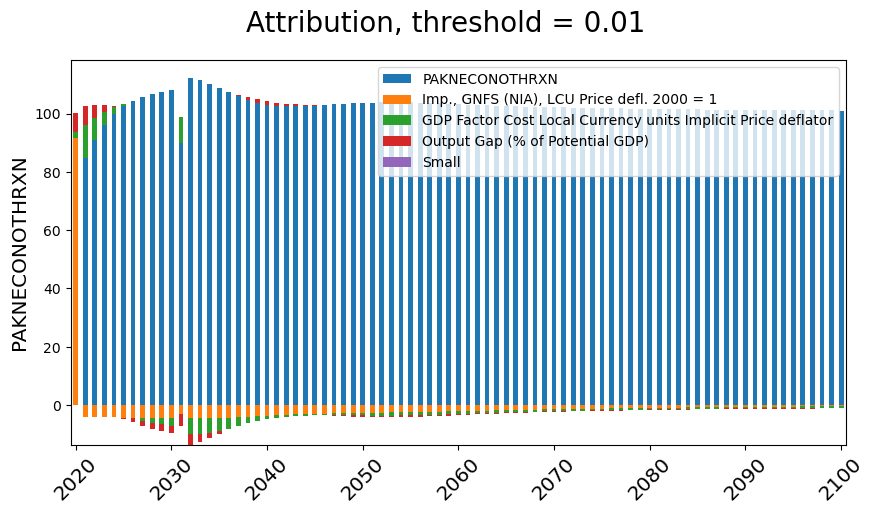

In [18]:
fig=mpak.dekomp_plot('PAKNECONOTHRXN',pct=True,rename=True,threshold=.01,lag=False); #decomp of teh change in the level

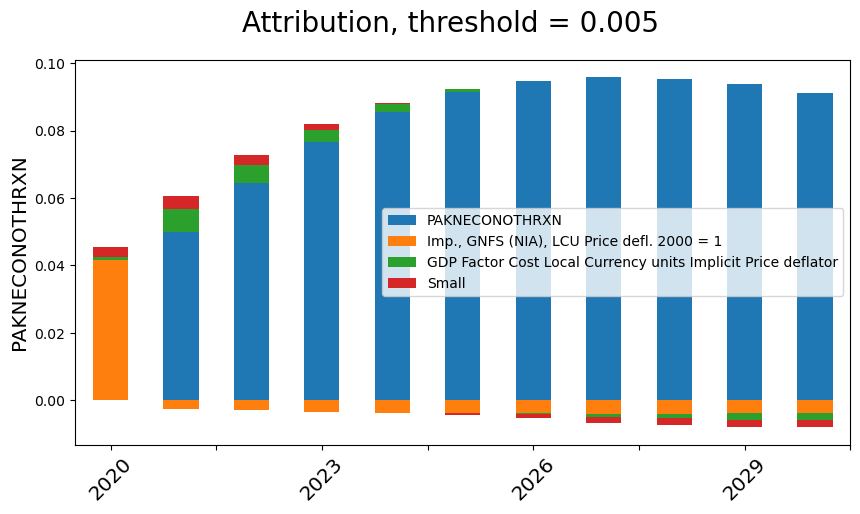

In [19]:
with mpak.set_smpl(2020,2030):
    fig=mpak.dekomp_plot('PAKNECONOTHRXN',pct=False,rename=True,threshold=.005,lag=False); #decomp of teh change in the level

In [20]:
mpak.PAKCCEMISCO2TKN .get_att(time_att= True,type='level',bare=0)

In [21]:
help(mpak.get_att)

Help on method get_att in module modelclass:

get_att(n, type='pct', filter=False, lag=True, start='', end='', time_att=False, threshold=0.0) method of modelclass.model instance
    Calculate the attribution percentage for a variable.
    
    Parameters:
        n (str): Name of the variable to calculate attribution for.
        type (str): Type of attribution calculation. Options: 'pct' (percentage), 'level', 'growth'. Default: 'pct'.
        filter (bool): [Deprecated] Use threshold instead of filter. Default: False.
        lag (bool): Flag to indicate whether to include lag information in the output. Default: True.
        start (str): Start period for calculation. If not provided, uses the first period in the model instance. Default: ''.
        end (str): End period for calculation. If not provided, uses the last period in the model instance. Default: ''.
        time_att (bool): Flag to indicate time attribute calculation. Default: False.
        threshold (float): Threshold va

In [22]:
help(mpak.dekomp_plot)

Help on method dekomp_plot in module modelclass:

dekomp_plot(varnavn, sort=True, pct=True, per='', top=0.9, threshold=0.0, lag=True, rename=True, nametrans=<function Dekomp_Mixin.<lambda> at 0x0000022437E6E170>, time_att=False) method of modelclass.model instance
    Returns  a chart with attribution for a variable over the smpl  
    
    Parameters
    ----------
    varnavn : TYPE
        variable name.
    sort : TYPE, optional
        . The default is False.
    pct : TYPE, optional
        display pct contribution . The default is True.
    per : TYPE, optional
        DESCRIPTION. The default is ''.
    threshold : TYPE, optional
        cutoff. The default is 0.0.
    rename : TYPE, optional
        Use descriptions instead of variable names. The default is True.
    time_att : TYPE, optional
        Do time attribution . The default is False.
    lag : TYPE, optional
       separete by lags The default is True.           
    top : TYPE, optional
      where to place the titl

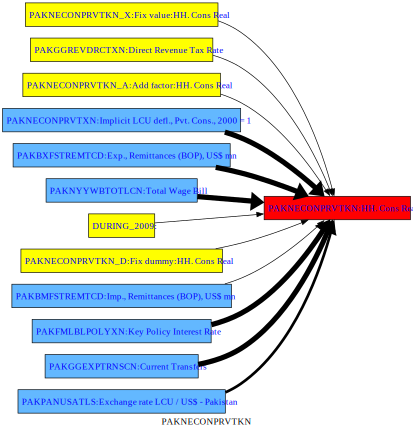

In [23]:
mpak.PAKNECONPRVTKN.tracepre()

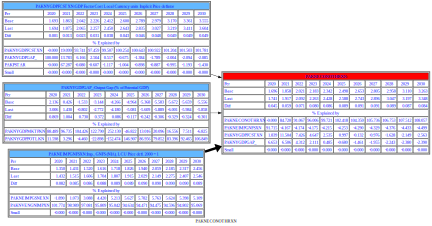

In [24]:
with mpak.set_smpl(2020,2030):
    mpak.PAKNECONOTHRXN.tracepre(filter=5.0,HR=False,fokus2all= True,attshow=True,per=2020)

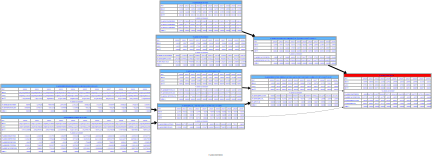

In [25]:
with mpak.set_smpl(2020,2030):
    mpak.PAKNECONOTHRXN.tracepre(up=2,filter=5,HR=False,fokus2all= True,attshow=True)

In [26]:
help(mpak.PAKNECONPRVTKN.tracepre)

Help on method tracepre in module modelvis:

tracepre(up=1, **kwargs) method of modelvis.varvis instance
    Trace dependensies of name down to level down



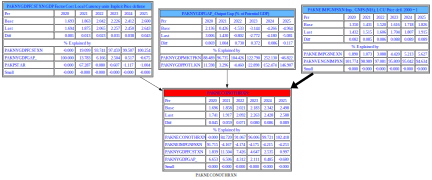

In [27]:
with mpak.set_smpl(2020,2025):
    #mpak.PAKNECONOTHRXN.tracepre(filter=0.20,HR=True,fokus2all= True,attshow=True)
    mpak.PAKNECONOTHRXN.tracepre(filter=0.20,HR=True,fokus2all= True,attshow=True)

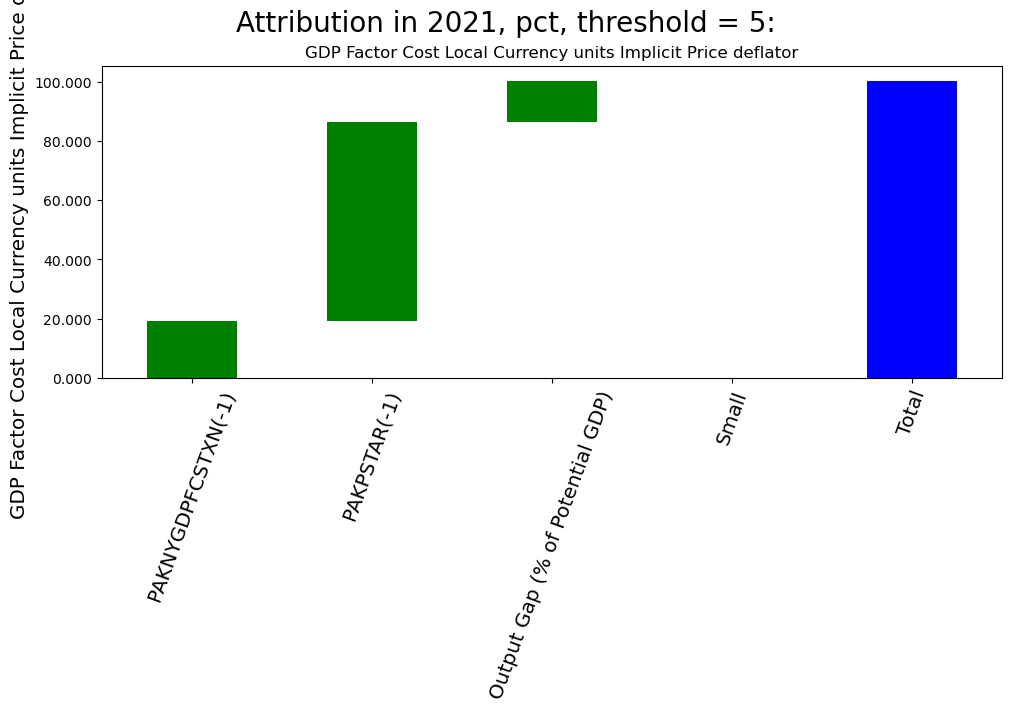

In [28]:
mpak.dekomp_plot_per('PAKNYGDPFCSTXN',per=2021,threshold=5)  # gives a waterfall of contributions

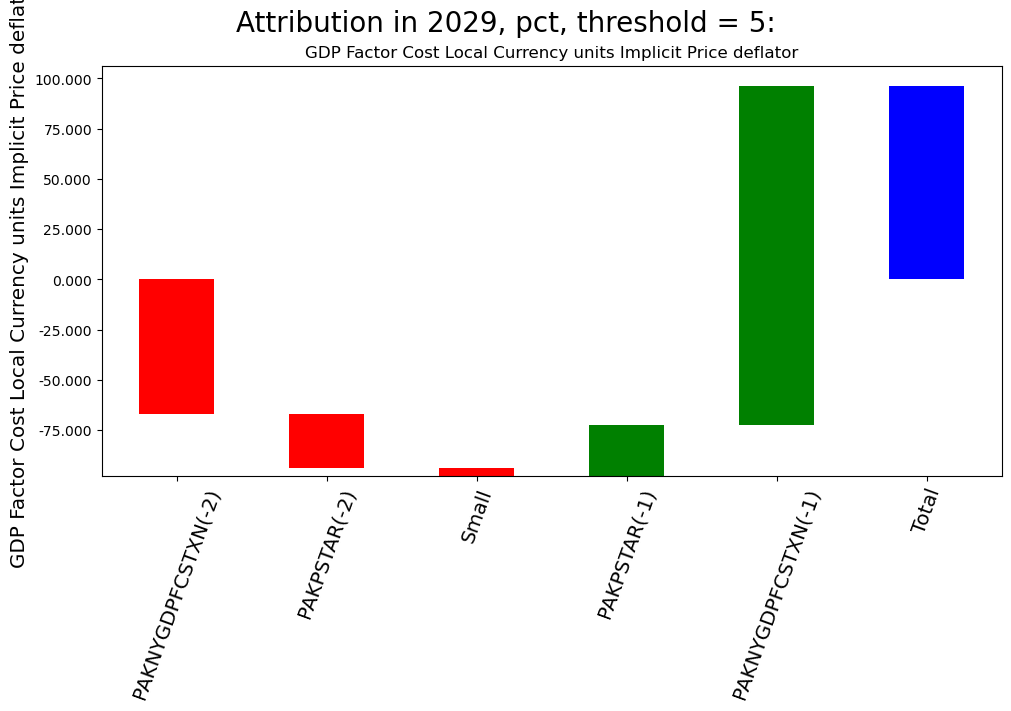

In [29]:
mpak.dekomp_plot_per('PAKNYGDPFCSTXN',per=2029,threshold=5,sort=True)  # gives a waterfall of contributions

In [30]:
mpak.exodif()

PAKGGREVCO2CER  PAKGGREVCO2GER  PAKGGREVCO2OER
2020       35.549839       71.000884        38.71065
2021       35.549839       71.000884        38.71065
2022       35.549839       71.000884        38.71065
2023       35.549839       71.000884        38.71065
2024       35.549839       71.000884        38.71065
...              ...             ...             ...
2096       35.549839       71.000884        38.71065
2097       35.549839       71.000884        38.71065
2098       35.549839       71.000884        38.71065
2099       35.549839       71.000884        38.71065
2100       35.549839       71.000884        38.71065

[81 rows x 3 columns]

In [31]:
totdekomp = mpak.totdif() # Calculate the total derivative½s of all equations in the model.

Total dekomp took       :         3.241 Seconds


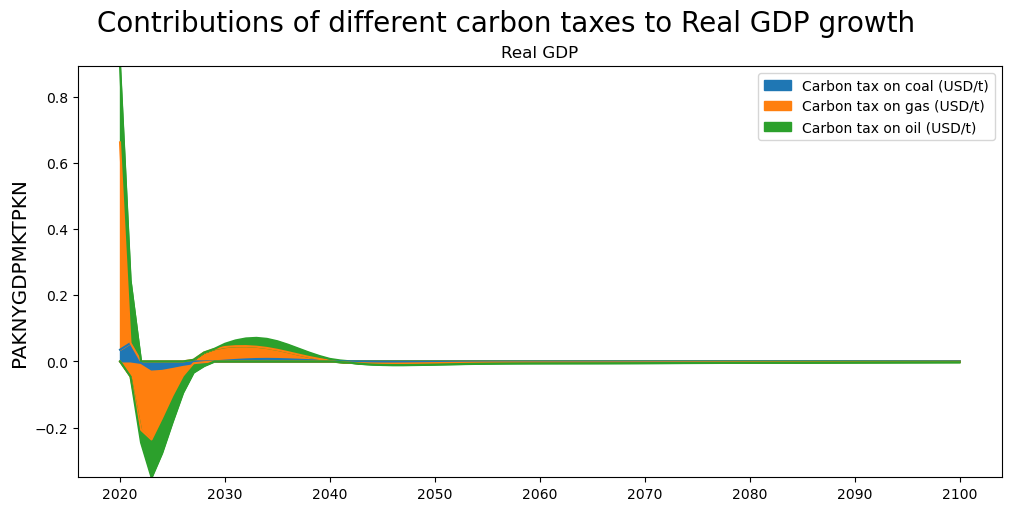

In [32]:
showvar = 'PAKNYGDPMKTPKN'
totdekomp.explain_all(showvar,kind='area',use='growth',stacked=True,
                      title="Contributions of different carbon taxes to Real GDP growth") ;

In [33]:
help(totdekomp.explain_all)

Help on method explain_all in module modeldekom:

explain_all(pat='', stacked=True, kind='bar', top=0.9, title='', use='level', threshold=0.0, resample='', axvline=None) method of modeldekom.totdif instance
    Explains all
    
    Args:
        pat (TYPE, optional): DESCRIPTION. Defaults to ''.
        stacked (TYPE, optional): DESCRIPTION. Defaults to True.
        kind (TYPE, optional): DESCRIPTION. Defaults to 'bar'.
        top (TYPE, optional): DESCRIPTION. Defaults to 0.9.
        title (TYPE, optional): DESCRIPTION. Defaults to ''.
        use (TYPE, optional): DESCRIPTION. Defaults to 'level'.
        threshold (TYPE, optional): DESCRIPTION. Defaults to 0.0.
        resample (TYPE, optional): DESCRIPTION. Defaults to ''.
        axvline (TYPE, optional): DESCRIPTION. Defaults to None.
    
    Returns:
        None.



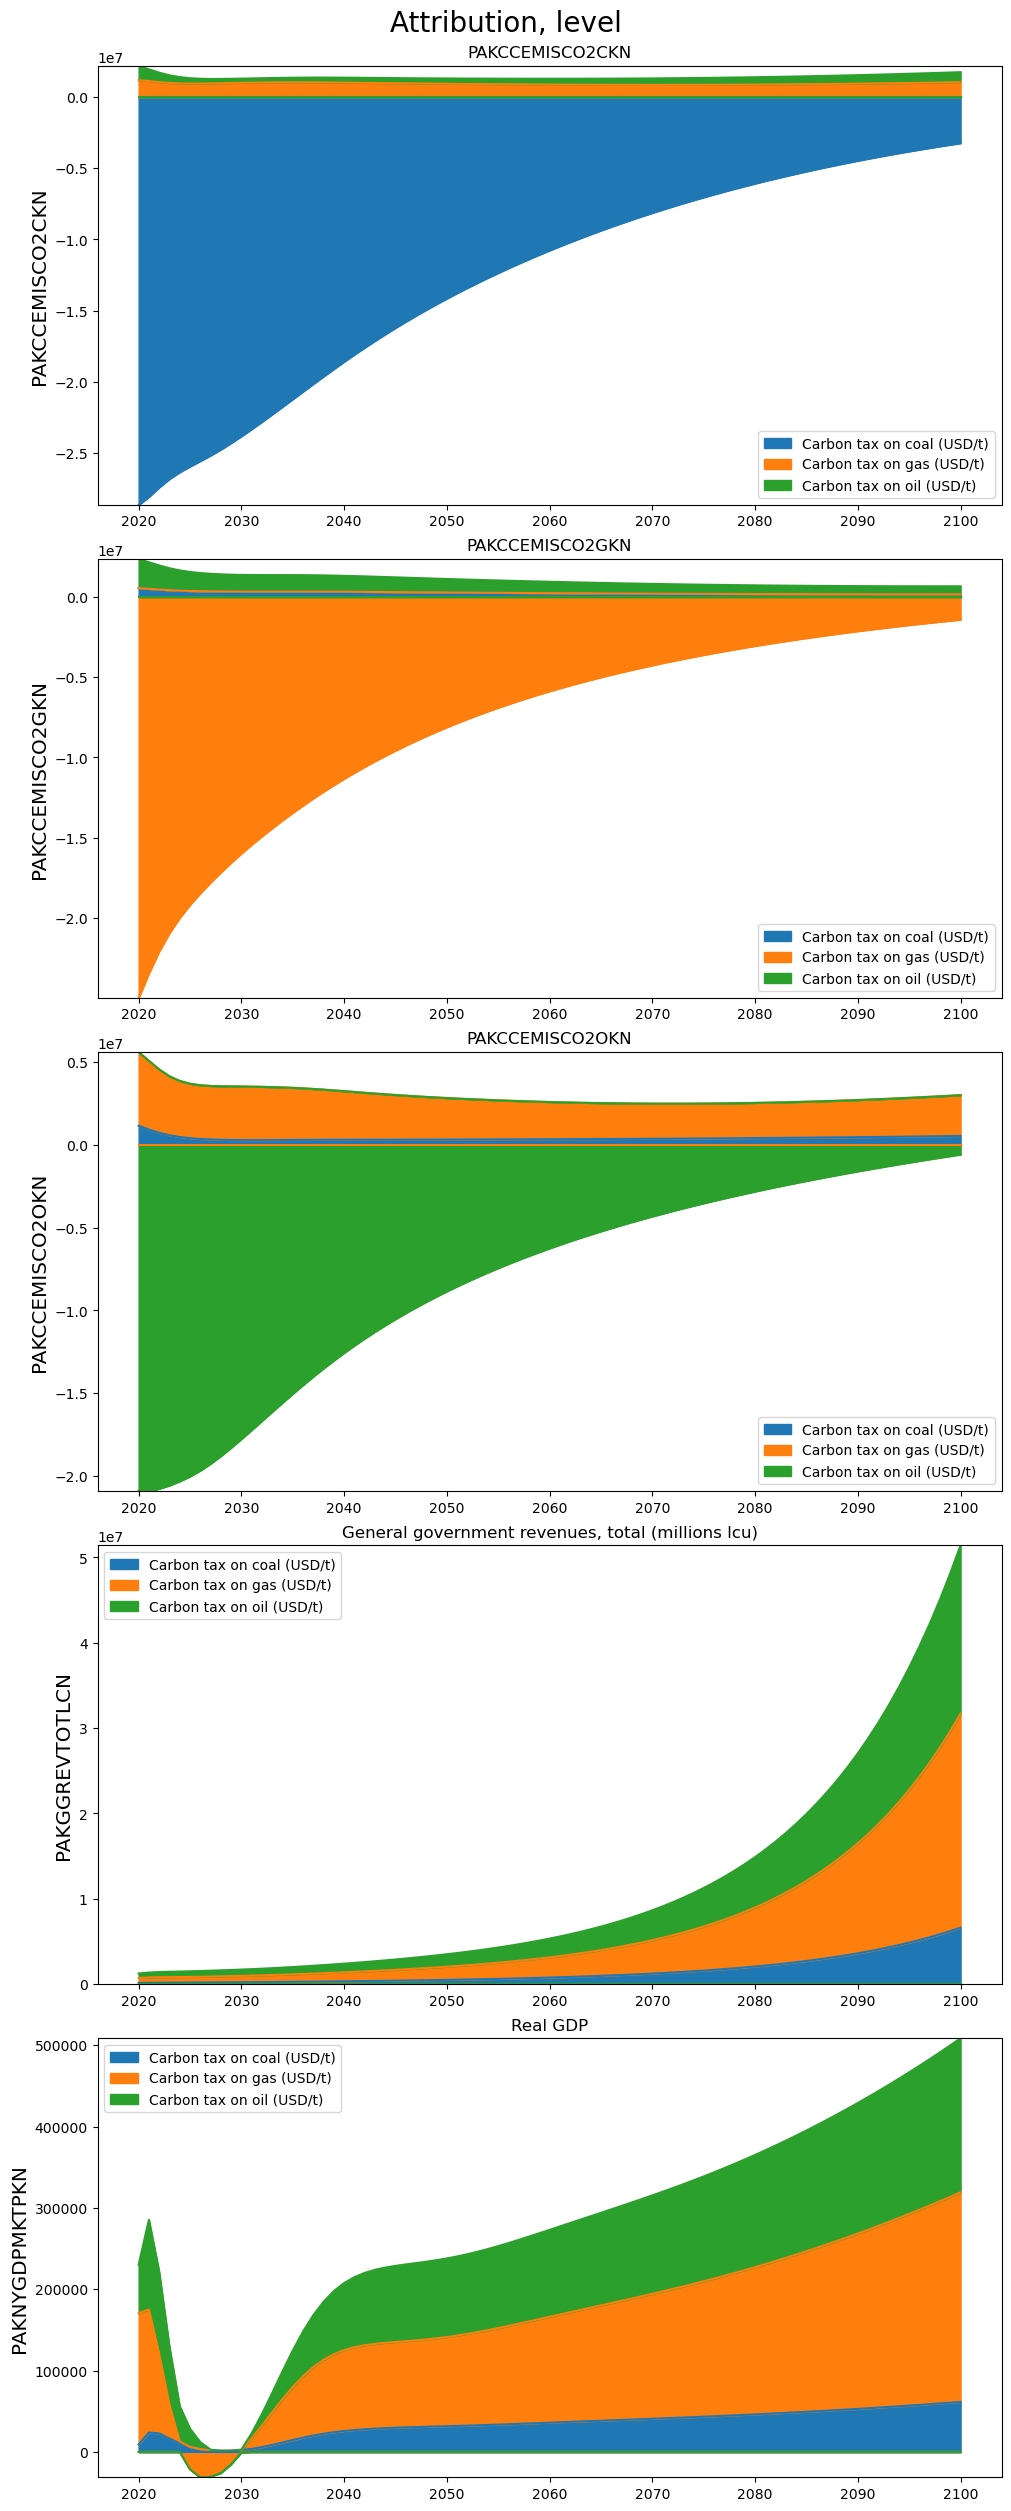

In [34]:
showvar = 'PAKNYGDPMKTPKN PAKCCEMISCO2CKN PAKCCEMISCO2OKN PAKCCEMISCO2GKN PAKGGREVTOTLCN'

totdekomp.explain_all(showvar,kind='area',stacked=True);    

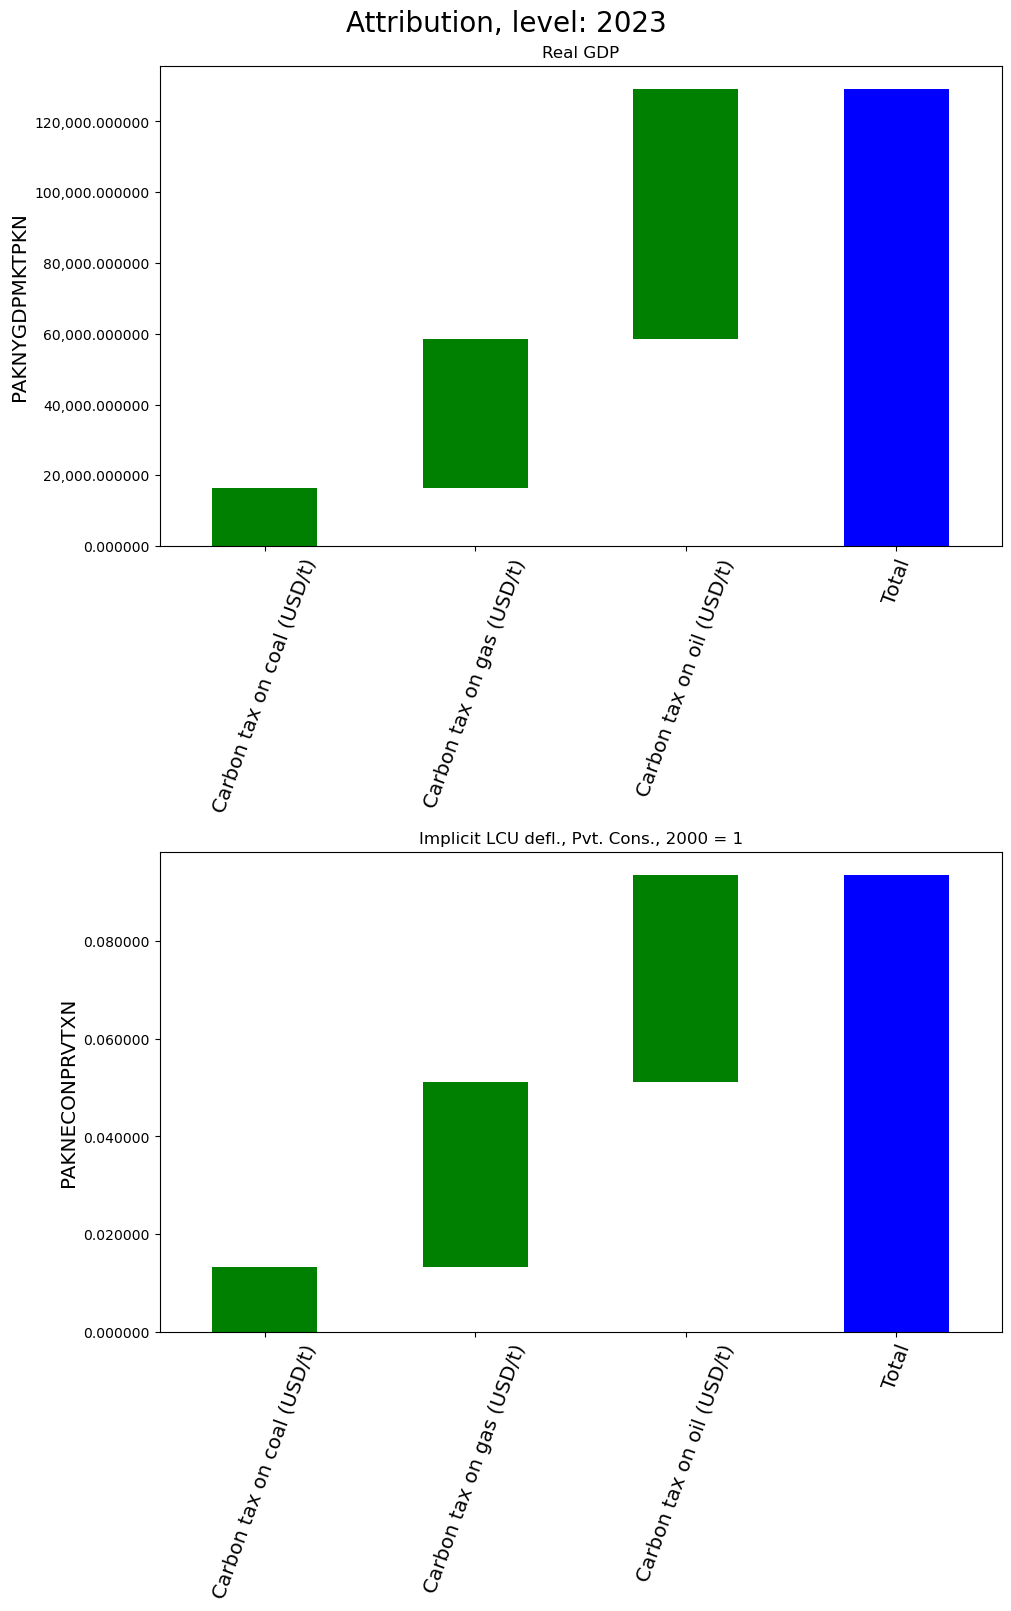

In [35]:
showvar = 'PAKNYGDPMKTPKN PAKNECONPRVTXN'

totdekomp.explain_per(showvar,per=2023,ysize=8)

In [36]:
display(mpak.get_att_gui(var='PAKGGREVTOTLCN',ysize=7));

interactive(children=(Dropdown(description='Variable', index=108, options=('CHNEXR05', 'CHNPCEXN05', 'DEUEXR05…

None

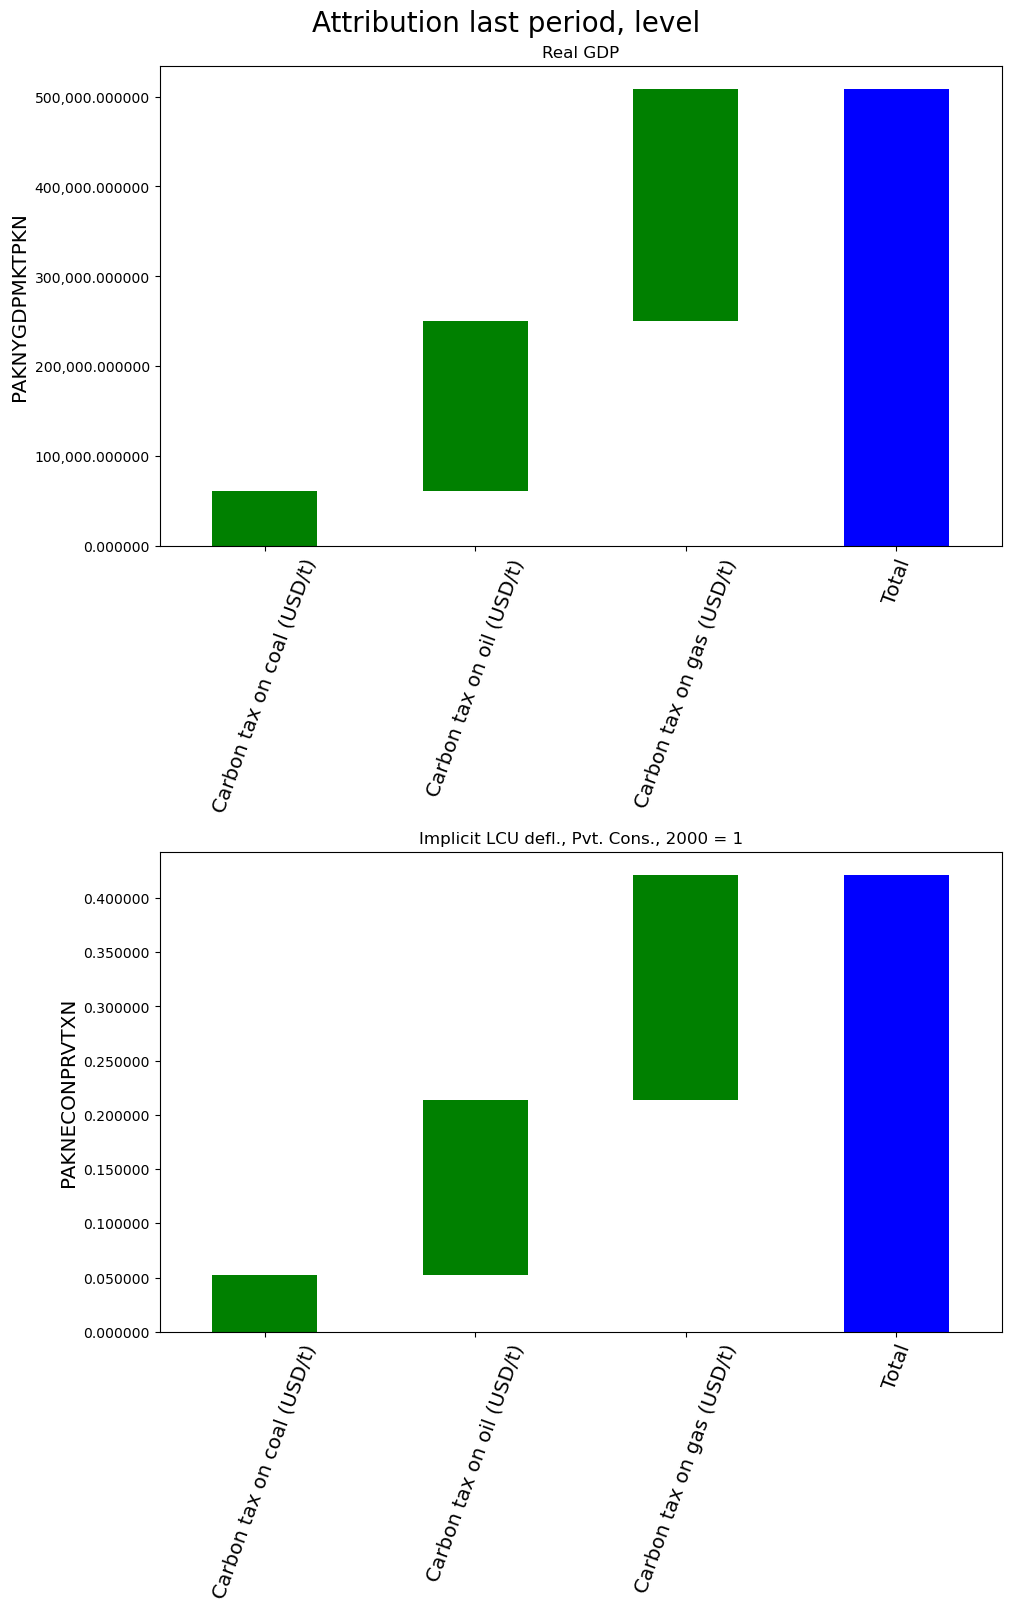

In [37]:
totdekomp.explain_last(showvar,ysize=8)

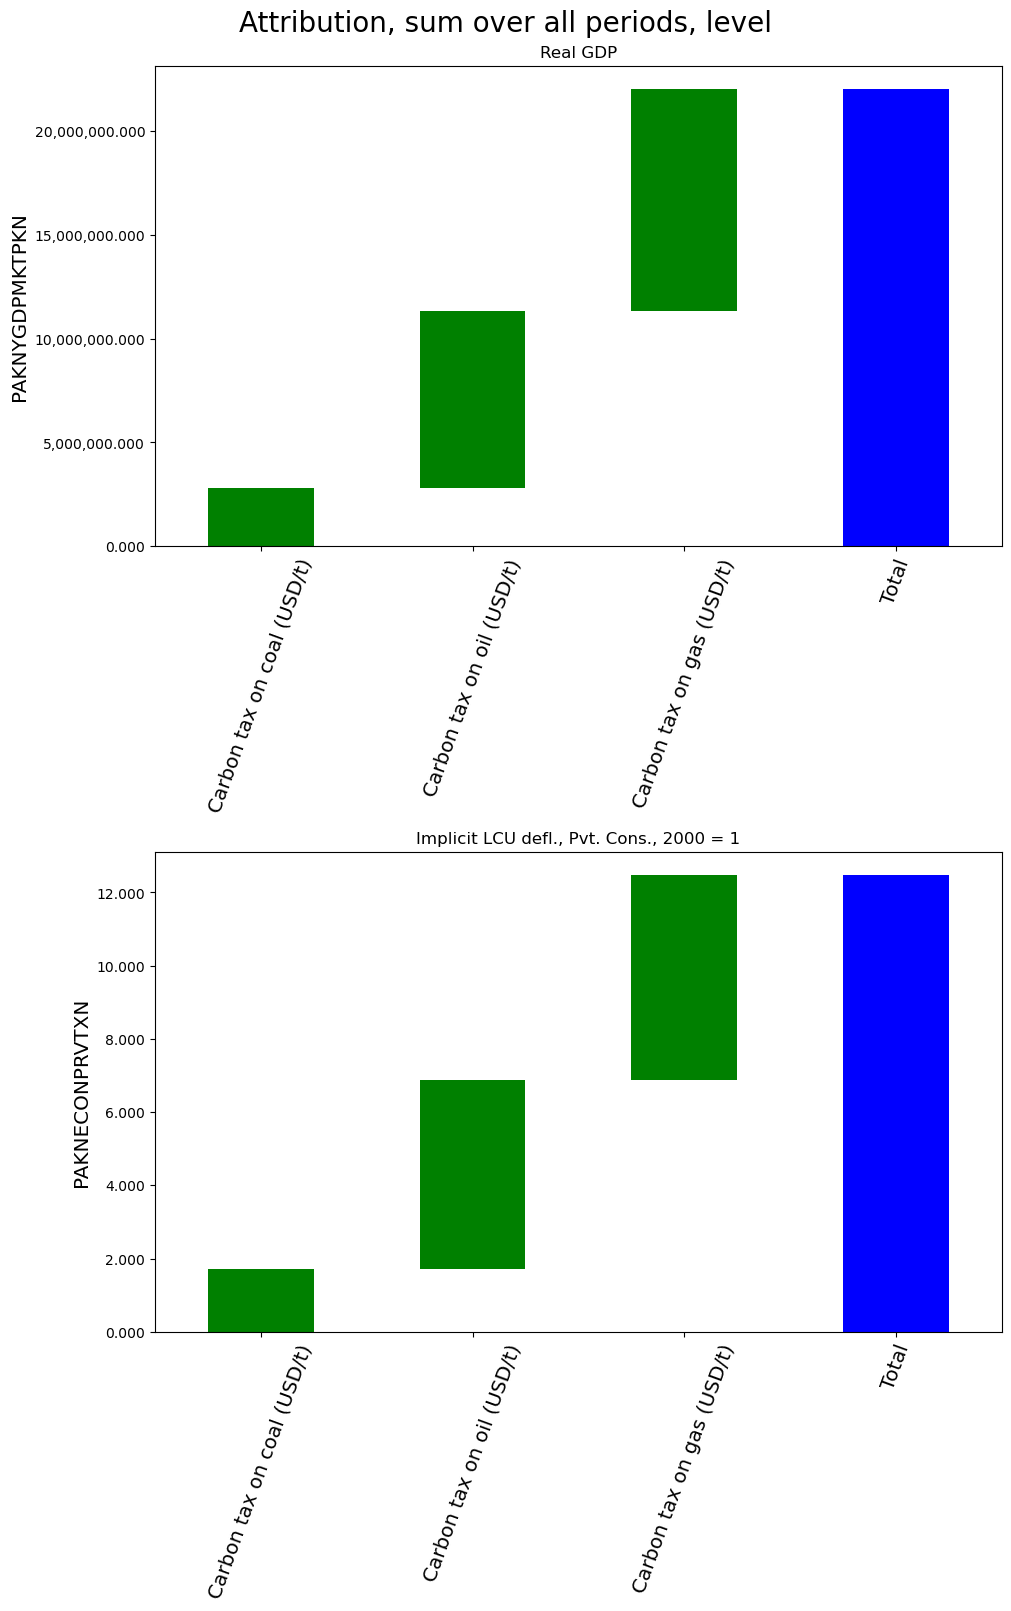

In [38]:
totdekomp.explain_sum(showvar,ysize=8)

In [39]:
experiments = {'gas and coal':['PAKGGREVCO2CER', 'PAKGGREVCO2GER'],'Oil':['PAKGGREVCO2OER']}
totdekomp_group = mpak.totdif(experiments = experiments) # Calculate the total derivative½s of all equations in the model.

Total dekomp took       :         2.250 Seconds


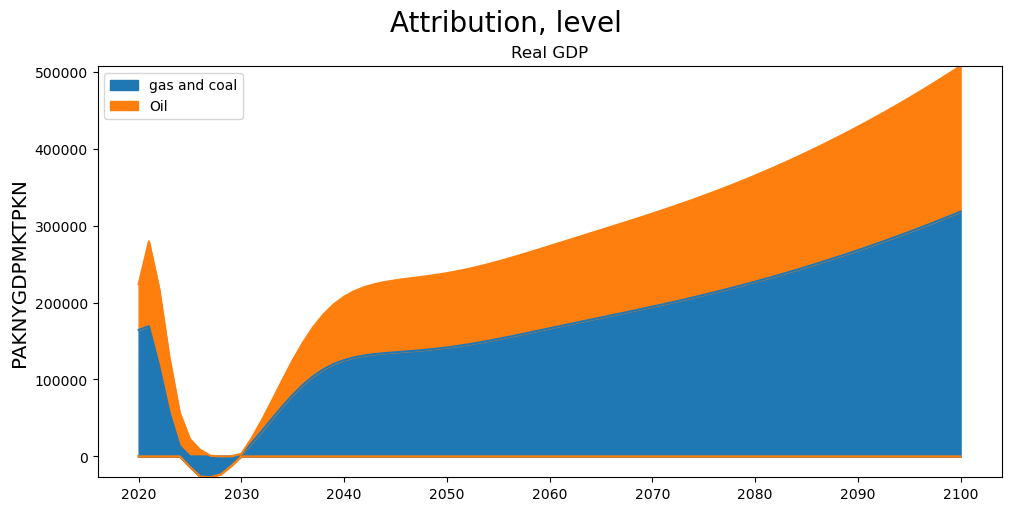

In [40]:
showvar = 'PAKNYGDPMKTPKN'
totdekomp_group.explain_all(showvar,kind='area',stacked=True);    

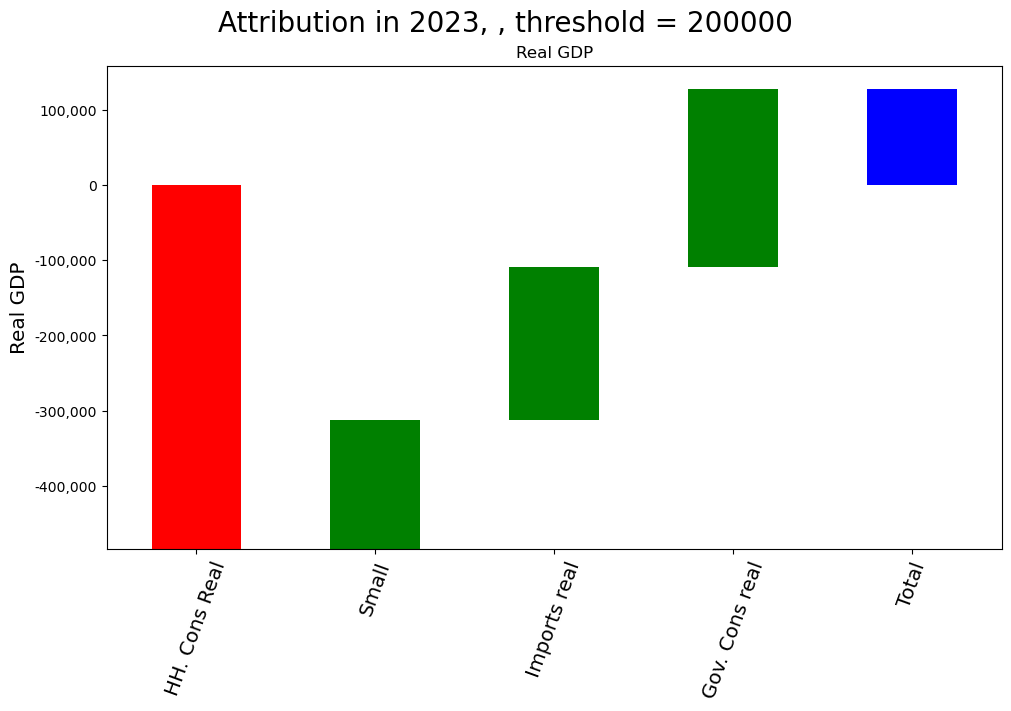

In [41]:
mpak.dekomp_plot_per('PAKNYGDPMKTPKN',per=2023,pct=0,rename=1,sort=1,threshold =200000,ysize=7)

In [42]:
with mpak.set_smpl(2020,2024):
    mpak['PAKNYGDPMKTPKN'].dekomp(time_att=True)


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                      2020        2021        2022        2023        2024
Variable   lag                                                            
t-1        0   25760579.27 26471666.00 26767616.83 26891916.75 27090476.06
t          0   26471666.00 26767616.83 26891916.75 27090476.06 27455212.23
Difference 0     711086.73   295950.83   124299.92   198559.31   364736.17
Percent    0          2.76        1.12        0.46        0.74        1.35

 Contributions to differende for  PAKNYGDPMKTPKN
                         2020       2021       2022       2023       2024
Variable       lag                                                       
PAKNECONPRVTKN 0    416507.93  218812.97  107677.34  182518.76  332666.98
PAKNECONGOVTKN 0    348503.70   56821.70   -8433.94   15765.70   61617.96
PAKNEGDIFTOTKN 0    224846

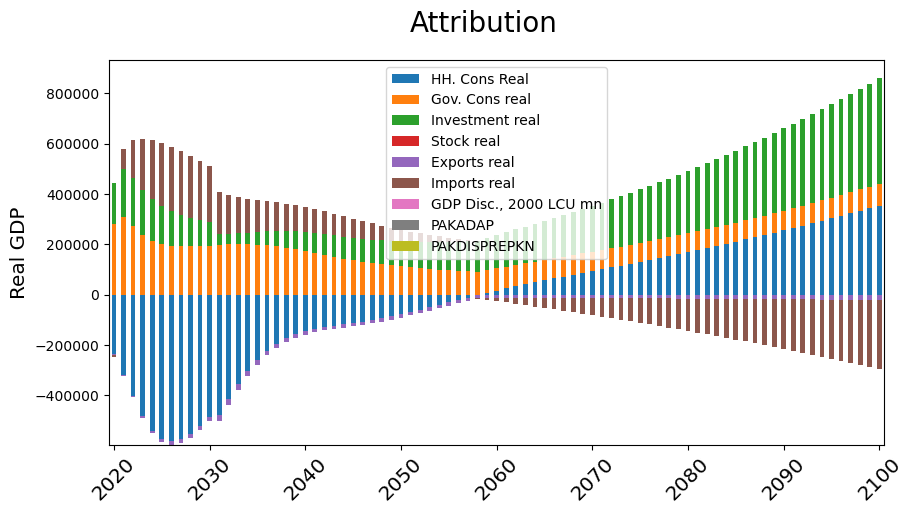

In [43]:
mpak.dekomp_plot('PAKNYGDPMKTPKN',pct=0,rename=1,sort=1,threshold =0,time_att = True);

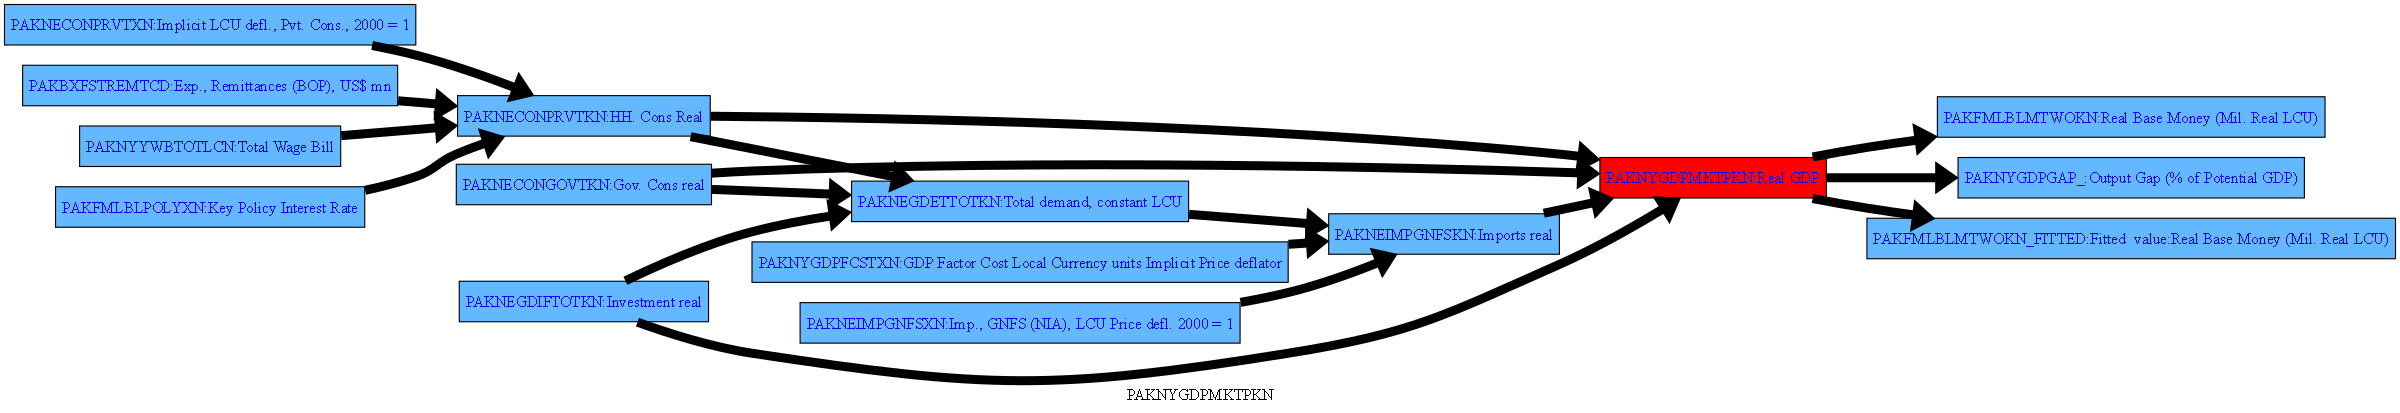

In [44]:
#mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=3,down=0,png=latex,filter=20) # For book
mpak['PAKNYGDPMKTPKN'].draw(up=3,down=1,png=latex,filter=400,svg=True,size=(8,40))#3 for interactice

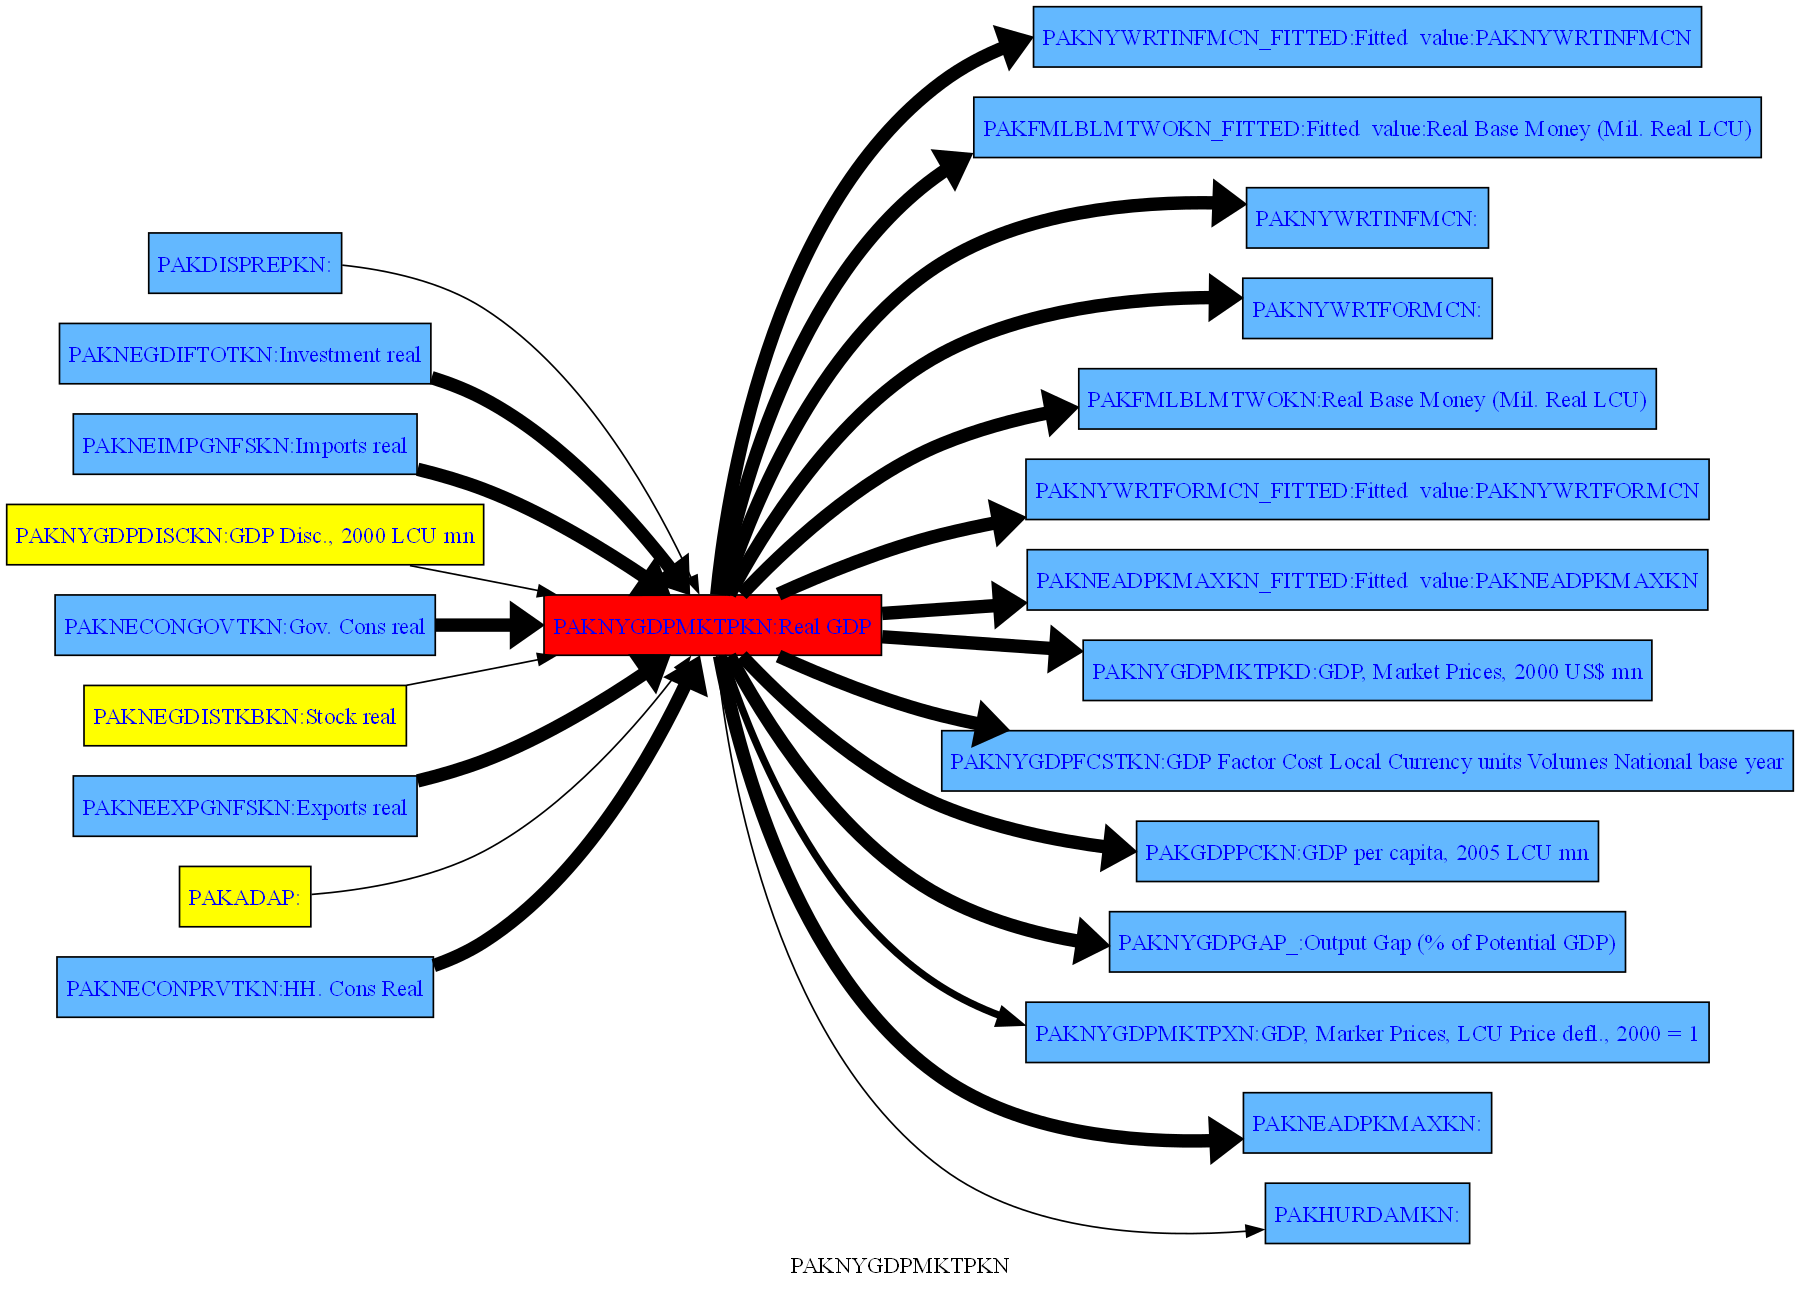

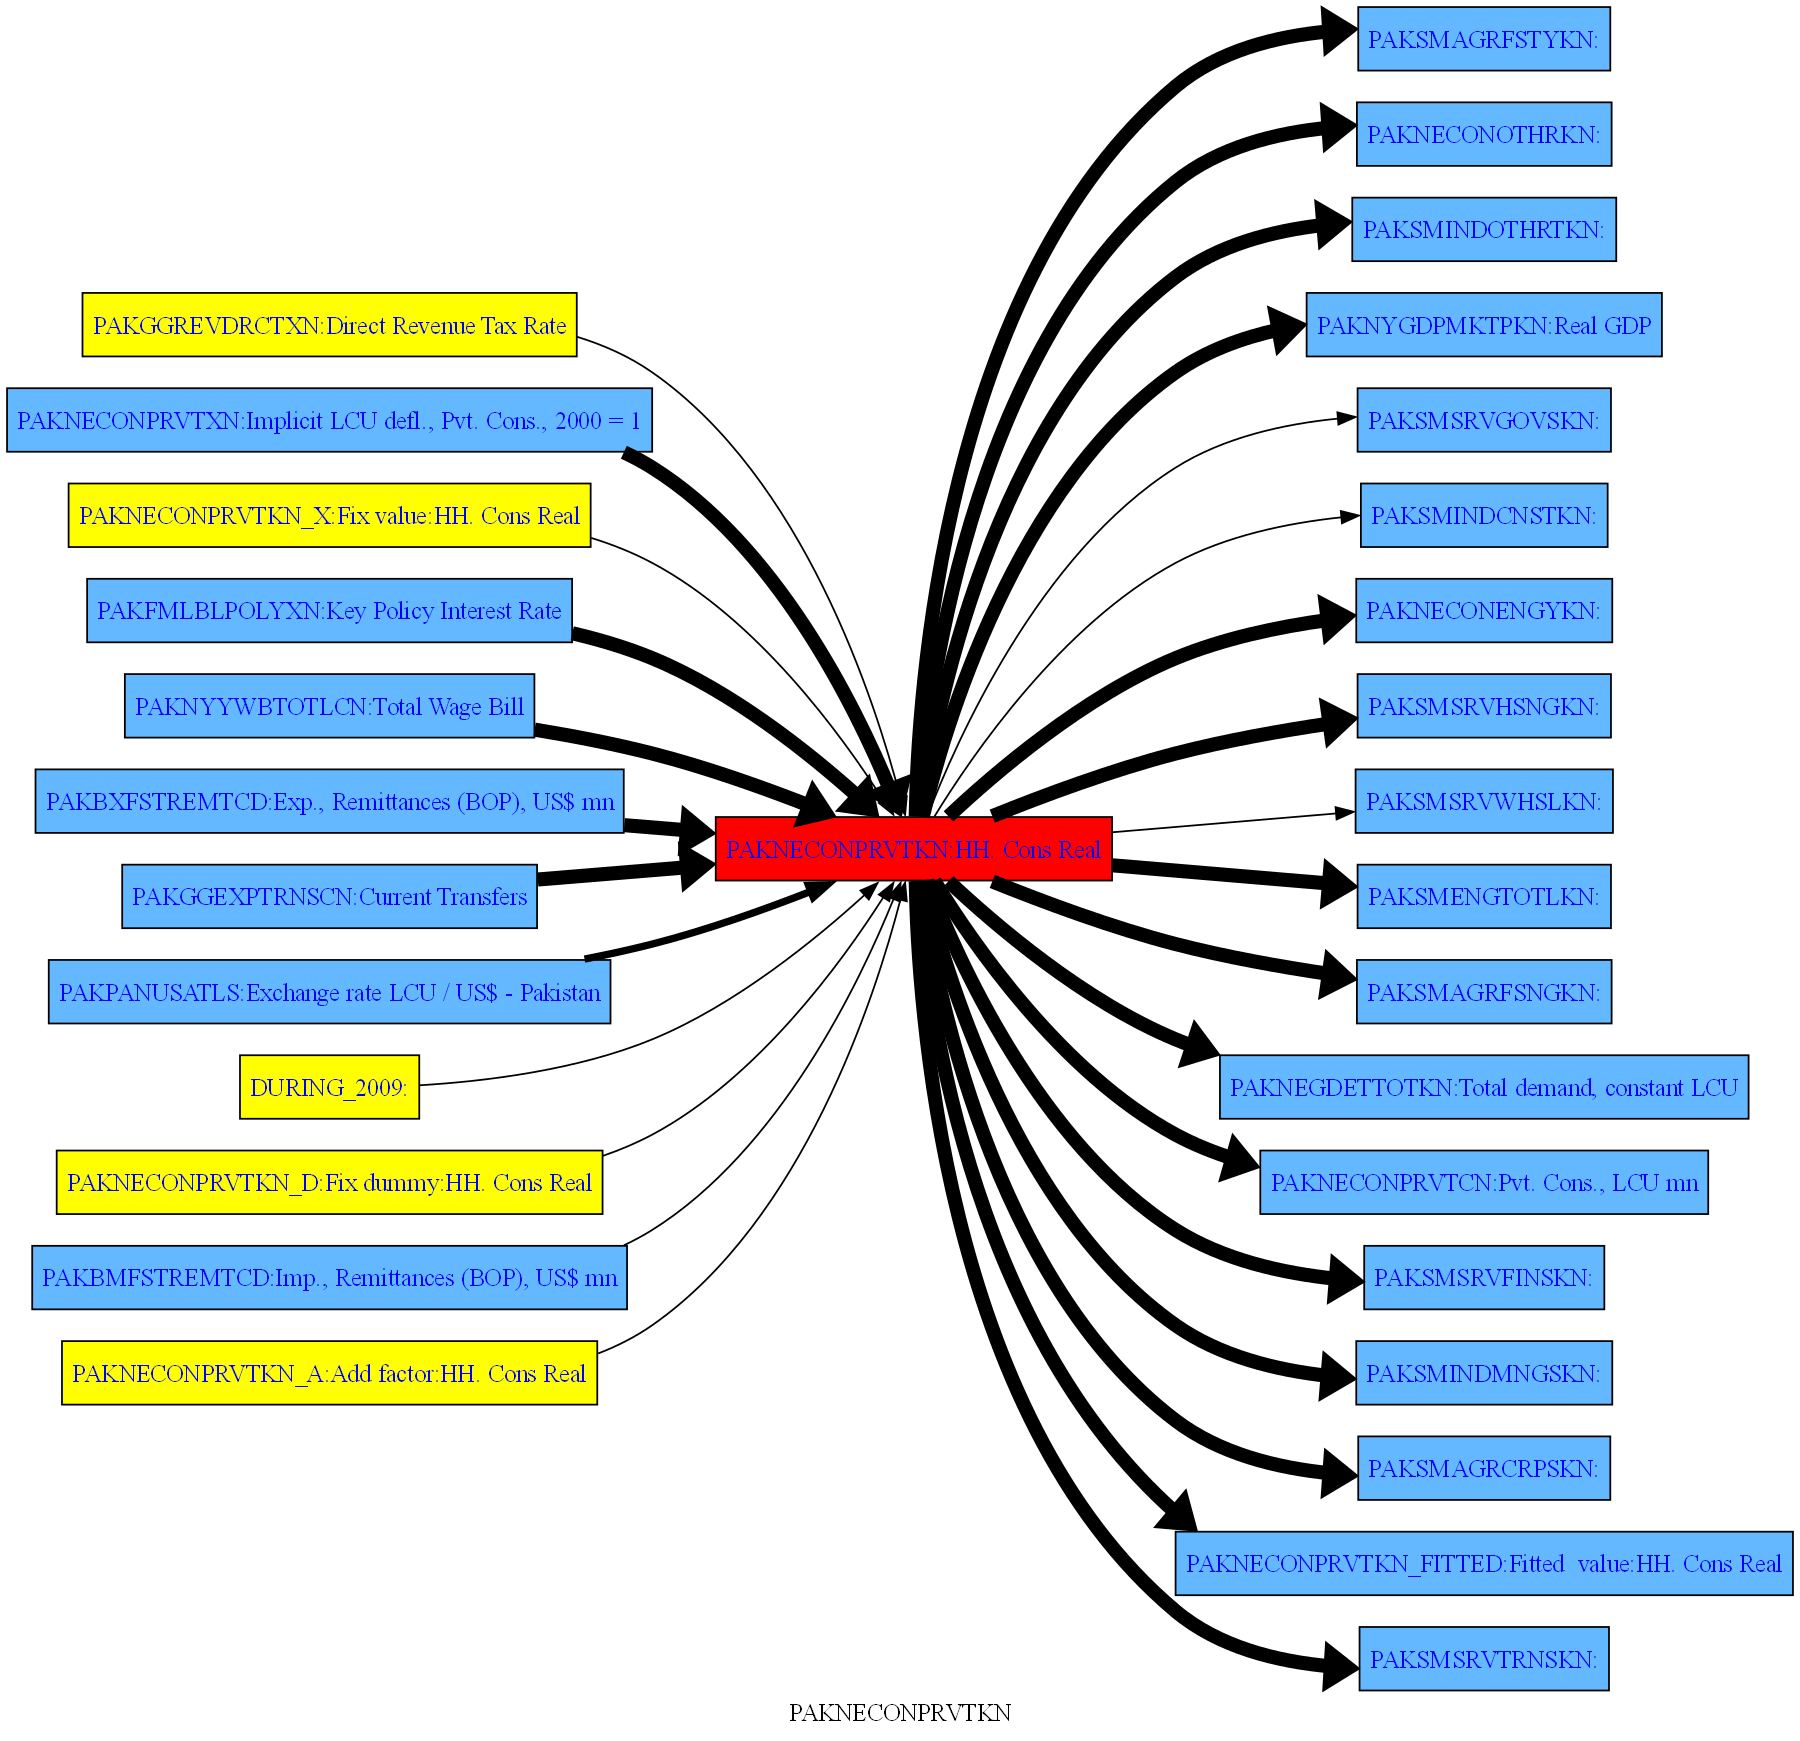

In [45]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1,png=latex)  # diagram all direct dependencies 

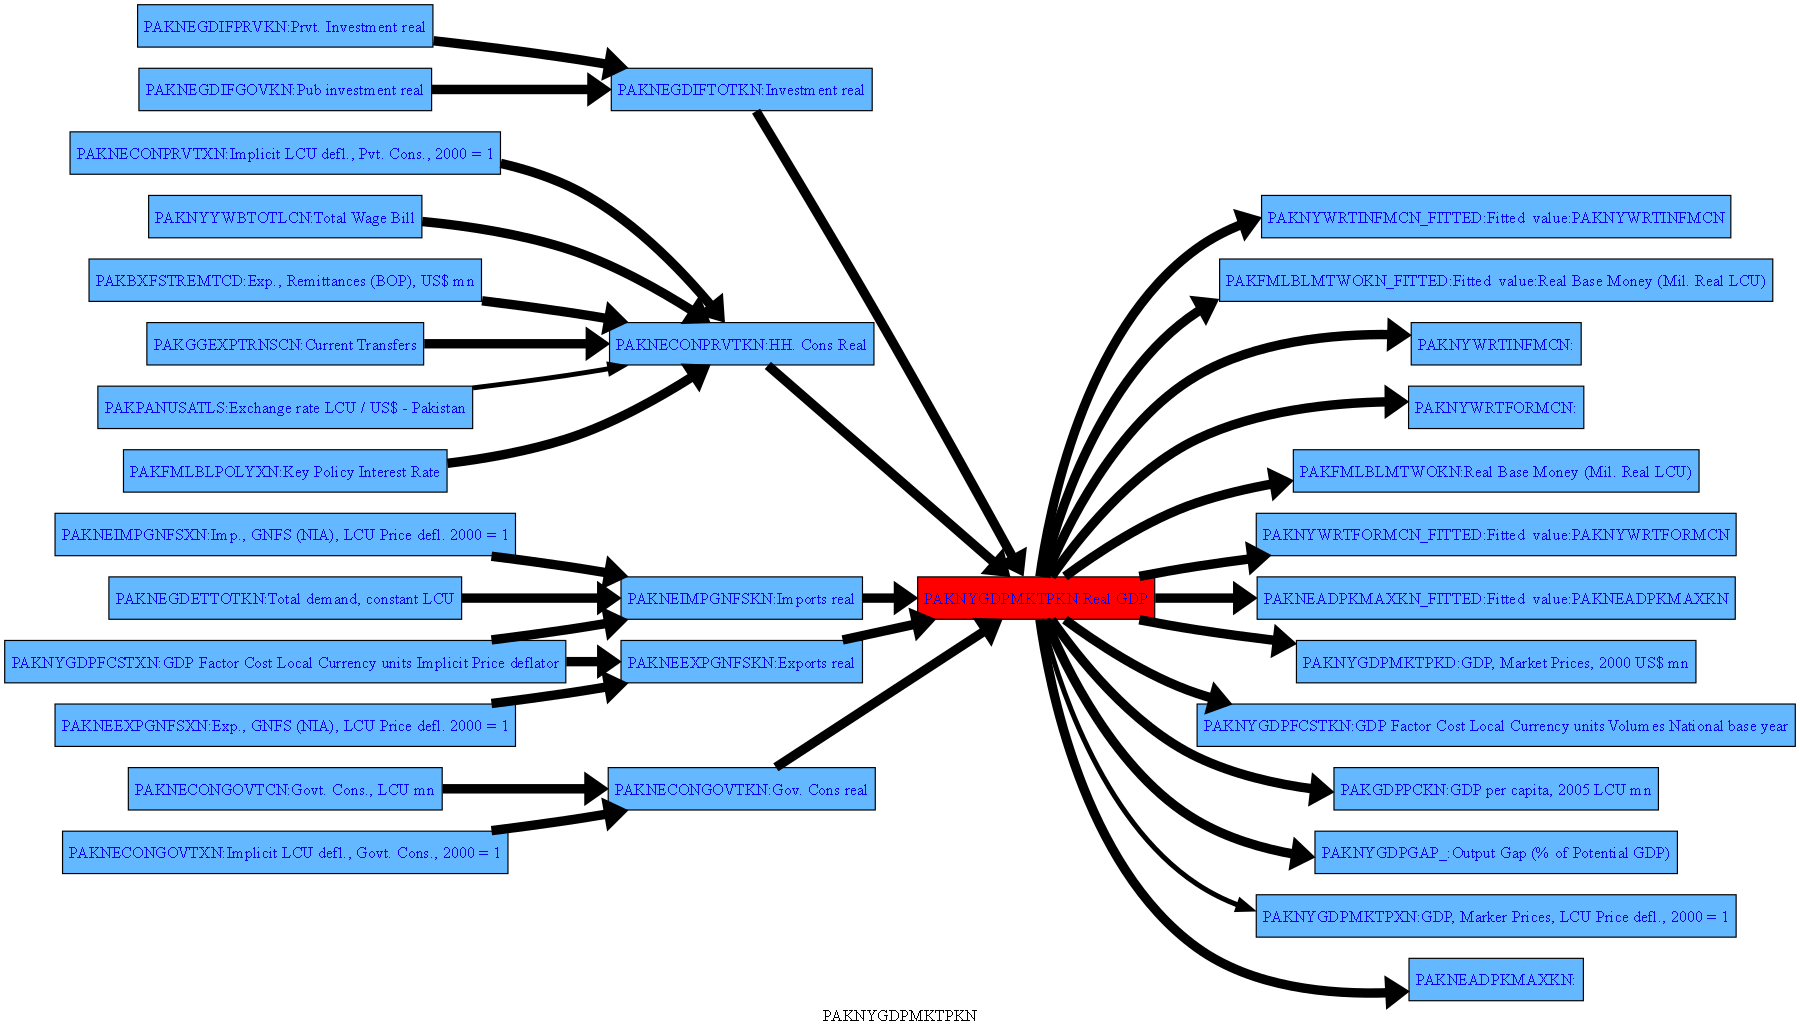

In [46]:
mpak['PAKNYGDPMKTPKN'].draw(up=2,down=1,png=latex,filter=20) 

In [47]:

try:
    mpak.modeldash('PAKNYGDPMKTPKN',jupyter=1,inline=False)
except: 
    print('No Dashboard installed')

apprun
Dash is running on http://127.0.0.1:5001/



Dash app running on http://127.0.0.1:5001/


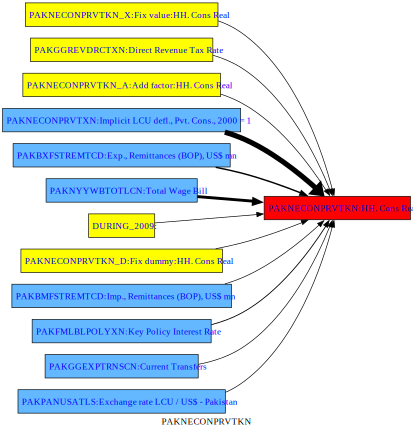

In [48]:
with mpak.set_smpl(2020,2023):
    mpak.PAKNECONPRVTKN.tracepre()

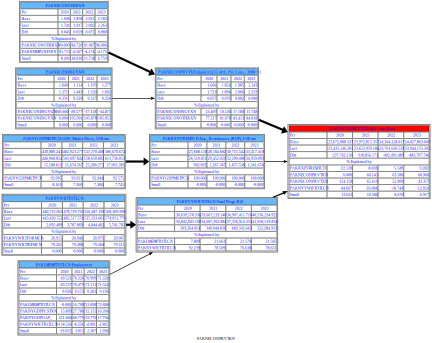

In [49]:
with mpak.set_smpl(2020,2023):
    mpak.PAKNECONPRVTKN.tracepre(fokus2all=True,HR=0,filter=20,
                                 attshow=1,up=2,browser=1,growthshow=0)